# Rossmann Store Sales

## 1. Problem Definition
In a statement,
> Forcast the Sales column using Store, Promotion and Competitor Data.

## 2. Data
The original data came from a kaggle competition https://www.kaggle.com/c/rossmann-store-sales/data

There are 3 main datasets:

* train.csv - historical data including Sales
* test.csv - historical data excluding Sales
* store.csv - supplemental information about the stores


## 3. Evaluation
The evaluation metric for this competition is the RMSPE (Root Mean Square Percentage Error).

For more on the evaluation of this project check: https://www.kaggle.com/c/rossmann-store-sales/overview/evaluation

## 4. Features
Here, we get to see different information about each of the features in the data. I looked up some of the definition online.

**Data fields**

* Id - an Id that represents a (Store, Date) duple within the test set
* Store - a unique Id for each store
* Sales - the turnover for any given day (this is what you are predicting)
* Customers - the number of customers on a given day
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - differentiates between 4 different store models: a, b, c, d
* Assortment - describes an assortment level: a = basic, b = extra, c = extended
* CompetitionDistance - distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* Promo - indicates whether a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Our train dataset
train_data = pd.read_csv("train.csv")
train_data.head()

C:\Users\oabas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
# The store dataset
store_data = pd.read_csv("store.csv")
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
# Merging the train and store details data based on store number to get complete info for each store
combined_data = pd.merge(train_data, store_data, on="Store")
combined_data.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [5]:
combined_data.shape

(1017209, 18)

In [6]:
combined_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [7]:
# Unique values in dataset
columns = list(combined_data.columns)
columns.remove("Date")
columns.remove("CompetitionDistance")
for col in columns:
    print(col,"-------->",combined_data[col].unique())

Store --------> [   1    2    3 ... 1113 1114 1115]
DayOfWeek --------> [5 4 3 2 1 7 6]
Sales --------> [ 5263  5020  4782 ... 20362 18841 21237]
Customers --------> [ 555  546  523 ... 3727 4022 4106]
Open --------> [1 0]
Promo --------> [1 0]
StateHoliday --------> ['0' 'a' 'b' 'c' 0]
SchoolHoliday --------> [1 0]
StoreType --------> ['c' 'a' 'd' 'b']
Assortment --------> ['a' 'c' 'b']
CompetitionOpenSinceMonth --------> [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
CompetitionOpenSinceYear --------> [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Promo2 --------> [0 1]
Promo2SinceWeek --------> [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Promo2SinceYear --------> [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
PromoInterval --------> [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


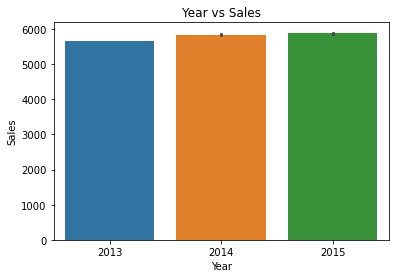

In [8]:
# Extracting year and month from Date
combined_data['Year'] = combined_data['Date'].apply(lambda x: int(str(x)[:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))

# Sales with respect to year
sns.barplot(x='Year', y='Sales', data=combined_data).set(title="Year vs Sales")
plt.show()

**Sales has been increasing year to year**

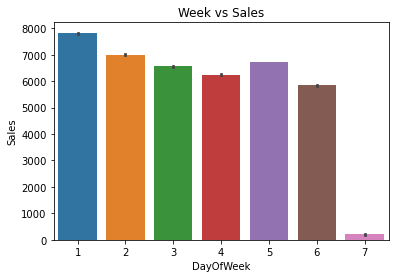

In [9]:
# Sales with respect to week
sns.barplot(x='DayOfWeek', y='Sales', data=combined_data).set(title='Week vs Sales')
plt.show()

**Sales on 1 (Monday), 2 (Tuesday) and 5 (Friday) are the highest**

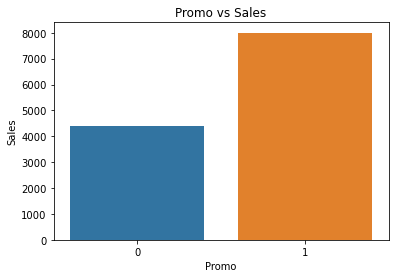

In [10]:
# Sales with respect to Promo
sns.barplot(x='Promo', y='Sales', data=combined_data).set(title='Promo vs Sales')
plt.show()

**Customers are definately attracted by Promo codes thus sales are higher when there is a Promo code in a Store**

C:\Users\oabas\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


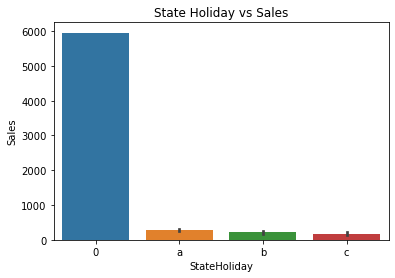

In [11]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == 0] = "0"

# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=combined_data).set(title='State Holiday vs Sales')
plt.show()

**Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c where:**
* a = Public Holiday
* b = Easter Holiday
* c = Chirstmas
* 0 = No Holiday, Working day

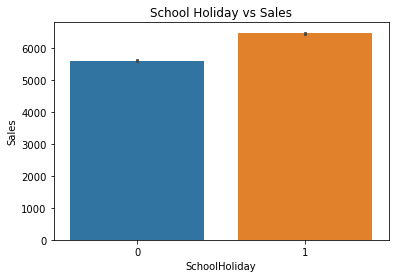

In [12]:
# Sales with respect to School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data).set(title='School Holiday vs Sales')
plt.show()

**On School Holidays there are more sales!**

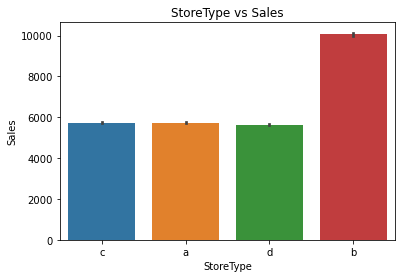

In [13]:
# Sales with respect to StoreType
sns.barplot(x='StoreType', y='Sales', data=combined_data).set(title='StoreType vs Sales')
plt.show()

**a,b,c,d are store models where b type stores have the highest sales**

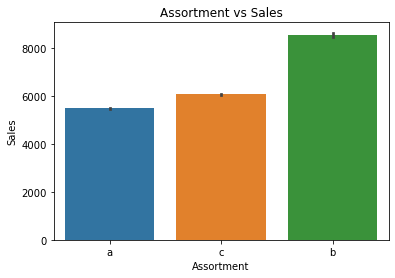

In [14]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='Assortment vs Sales')
plt.show()

**Assortment level b have the highest sales
Assortment levels:**
* a = basic
* b = extra
* c = entended

## Filling Missing Values and Removing Outliers

Few columns have high number of missing values, so we need to fill them with appropriate method for better result

### Filling Missing Values

In [15]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [16]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [17]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
store_data.update(store_data[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].fillna(0))

In [18]:
# Filling CompetitionDistance with mean distance
mean_competition_distance = store_data['CompetitionDistance'].mean()

store_data['CompetitionDistance'].fillna(mean_competition_distance, inplace=True)

In [19]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively
mode_competition_open_month = store_data['CompetitionOpenSinceMonth'].mode()[0]
mode_competition_open_year = store_data['CompetitionOpenSinceYear'].mode()[0]

store_data['CompetitionOpenSinceMonth'].fillna(mode_competition_open_month, 
                                               inplace=True)

store_data['CompetitionOpenSinceYear'].fillna(mode_competition_open_year, 
                                              inplace=True)

In [20]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [21]:
combined_data = pd.merge(train_data, store_data, on="Store")
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [22]:
combined_data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

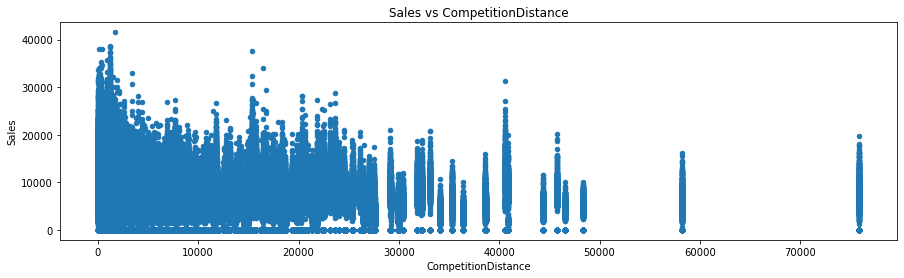

In [23]:
combined_data.plot(kind='scatter', 
                   x='CompetitionDistance', 
                   y='Sales', 
                   figsize=(15,4), 
                   title="Sales vs CompetitionDistance");

`CompetitionDistance` is the distance in meters to the nearest competitor store, the more nearer the two stores are the more sales can be seen

### Finding Outliers

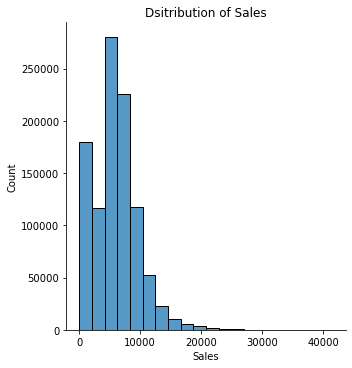

In [24]:
# Checking distribution of sales
sns.displot(combined_data, x="Sales", bins=20).set(title='Dsitribution of Sales');

As we can see in the distribution plot Sales greater than 30k are very less so they might be the outliers

### Z-Score: If the Z-Score of a datapoint is greater than 3 that can be considered as an Outlier

Mean of Sales:  5773.818972305593
Standard Deviation of Sales:  3849.9242828437527
Total outlier in dataset are:  9731
Maximum Sales Outlier:  41551
Minimum Sales Outlier:  17325


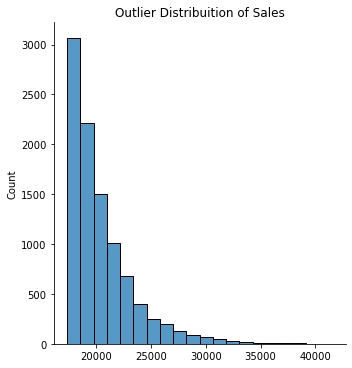

In [25]:
# Another way to identify the outlier is to look at the Z-score

mean_of_sales = np.mean(combined_data['Sales']) 
std_of_sales = np.std(combined_data['Sales'])
print("Mean of Sales: ",mean_of_sales)
print("Standard Deviation of Sales: ",std_of_sales)

threshold = 3
outlier = [] 
for i in combined_data['Sales']: 
    z = (i - mean_of_sales) / std_of_sales
    if z > threshold: 
        outlier.append(i) 
print('Total outlier in dataset are: ', len(outlier))
print("Maximum Sales Outlier: ", max(outlier))
print("Minimum Sales Outlier: ", min(outlier))

sns.displot(x=outlier,bins=20).set(title='Outlier Distribuition of Sales');

In [26]:
# Looking for outliers
sales_zero = combined_data.loc[combined_data['Sales'] == 0] 
sales_greater_than_30 = combined_data.loc[combined_data['Sales'] > 30000]

print("Length of actual dataset:", len(combined_data))
print("Length of data where sales is 0:", len(sales_zero),
      " which is", len(sales_zero)/len(combined_data)*100, "% of the whole data", )

print("Length of data which is greater than 30:", len(sales_greater_than_30),
      "which is ", len(sales_greater_than_30)/len(combined_data)*100, "% of the whole data")

Length of actual dataset: 1017209
Length of data where sales is 0: 172871  which is 16.994639253093514 % of the whole data
Length of data which is greater than 30: 153 which is  0.015041156733768577 % of the whole data


Droping sales which are greater than 30k as they are very less in the dataset and are probably outliers

In [27]:
combined_data.drop(combined_data.loc[combined_data['Sales'] > 30000].index, inplace=True)
len(combined_data)

1017056

**Looking for a scenerio where the Stores are open and yet there is no sales on that day.**

In [28]:
# no sales when Stores were Open
no_holiday_zero_sales = combined_data.loc[(combined_data['Sales'] == 0) & (combined_data['Open'] == 1) & 
                                          (combined_data['StateHoliday'] == 0) & (combined_data['SchoolHoliday'] == 0)]

print("Size of the data where sales were zero even when stores were open: ",len(no_holiday_zero_sales))
no_holiday_zero_sales.head()

Size of the data where sales were zero even when stores were open:  12


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
22589,25,4,2014-02-13,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,0
22590,25,3,2014-02-12,0,0,1,0,0,0,c,a,430.0,4.0,2003.0,0,0.0,0.0,0
25212,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"
205303,227,4,2014-09-11,0,0,1,0,0,0,a,a,2370.0,9.0,2013.0,0,0.0,0.0,0
297110,327,3,2014-03-12,0,0,1,0,0,0,c,c,1390.0,12.0,2004.0,0,0.0,0.0,0


Removing these data points too as they are an exceptional case

In [29]:
combined_data.drop(combined_data.loc[(combined_data['Sales'] == 0) & (combined_data['Open'] == 1) & 
                                     (combined_data['StateHoliday'] == 0) & 
                                     (combined_data['SchoolHoliday'] == 0)].index,inplace=True)
len(combined_data)

1017044

In [30]:
combined_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### Converting Categorical Variable to Numeric

In [31]:
# extracting year and month from Date 
combined_data['Year']  = combined_data['Date'].apply(lambda x: int(str(x)[:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))
combined_data.drop(['Date'],axis=1,inplace=True)

In [32]:
combined_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [33]:
categorical = combined_data.select_dtypes(include='object').columns
categorical

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [34]:
# encoding all categorical varibale to numeric values
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

combined_data['StoreType']= label_encoder.fit_transform(combined_data['StoreType'])
combined_data['Assortment']= label_encoder.fit_transform(combined_data['Assortment']) 

In [35]:
# for promo interval
combined_data["PromoInterval"].loc[combined_data["PromoInterval"] == "Jan,Apr,Jul,Oct"] = 1
combined_data["PromoInterval"].loc[combined_data["PromoInterval"] == "Feb,May,Aug,Nov"] = 2
combined_data["PromoInterval"].loc[combined_data["PromoInterval"] == "Mar,Jun,Sept,Dec"] = 3

C:\Users\oabas\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
# for State Holiday
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == "a"] = 1
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == "b"] = 2
combined_data["StateHoliday"].loc[combined_data["StateHoliday"] == "c"] = 3

In [37]:
combined_data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,1,5,5263,555,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,5020,546,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,4782,523,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,5011,560,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,6102,612,1,1,0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [38]:
combined_data['StateHoliday'] = pd.to_numeric(combined_data['StateHoliday'])
combined_data['PromoInterval'] = pd.to_numeric(combined_data['PromoInterval'])

In [39]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017044 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017044 non-null  int64  
 1   DayOfWeek                  1017044 non-null  int64  
 2   Sales                      1017044 non-null  int64  
 3   Customers                  1017044 non-null  int64  
 4   Open                       1017044 non-null  int64  
 5   Promo                      1017044 non-null  int64  
 6   StateHoliday               1017044 non-null  int64  
 7   SchoolHoliday              1017044 non-null  int64  
 8   StoreType                  1017044 non-null  int32  
 9   Assortment                 1017044 non-null  int32  
 10  CompetitionDistance        1017044 non-null  float64
 11  CompetitionOpenSinceMonth  1017044 non-null  float64
 12  CompetitionOpenSinceYear   1017044 non-null  float64
 13  Promo2      

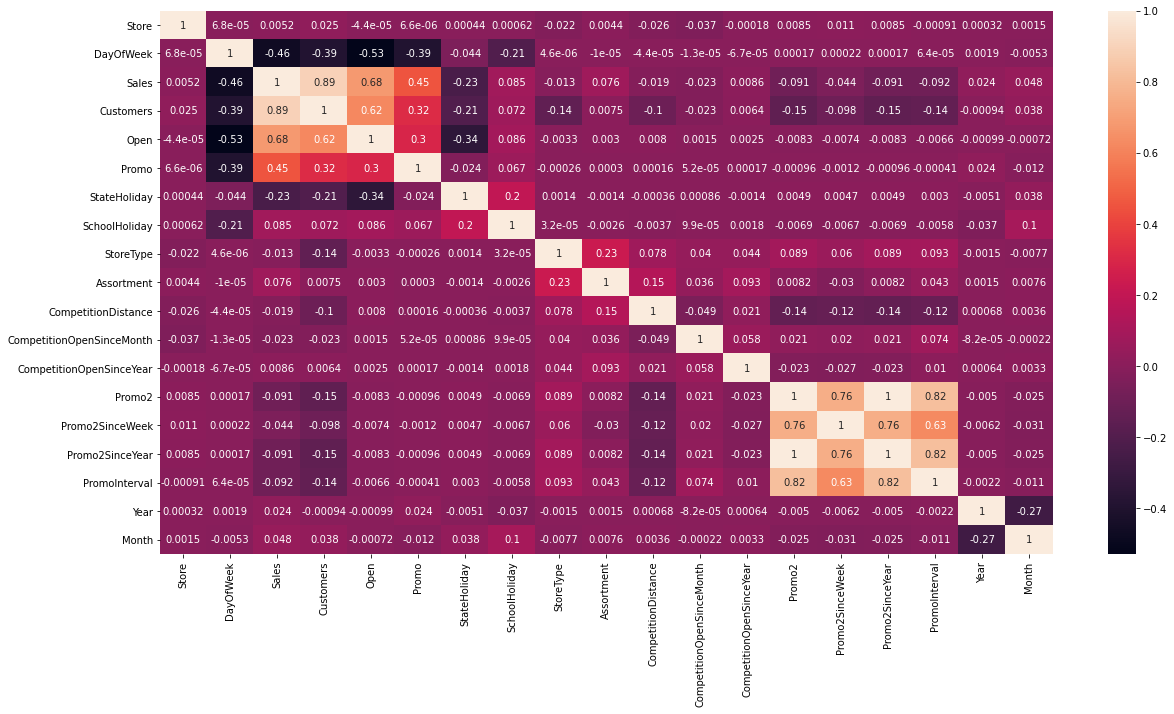

In [40]:
corr = combined_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True);

**Correlation map shows**
* Sales is highly correlated with Customers, Open, Promo code
* Promo code is highly correlated to Promo2SinceWeek, Promo2SinceYear, PromoInterval

## Implementing a Model

In [41]:
# Looking at all the instances when the store isn't open
combined_data[combined_data['Open'] == 0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
5,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
12,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
19,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
26,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
33,1,7,0,0,0,0,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017182,1115,7,0,0,0,0,0,0,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1
1017189,1115,7,0,0,0,0,0,0,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1
1017196,1115,7,0,0,0,0,0,0,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1
1017203,1115,7,0,0,0,0,0,1,3,2,5350.0,9.0,2013.0,1,22.0,2012.0,3,2013,1


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math

In [43]:
combined_data_subset = combined_data[combined_data['Open'] == 1]
combined_data_subset_closed = combined_data[combined_data['Open'] == 0]

X = combined_data_subset.drop(['Sales', 'Customers', 'Open'], axis=1)
y = combined_data_subset['Sales']

X_train, X_test, y_train, y_test_open = train_test_split(X, y, test_size=0.2)

In [44]:
X_train.columns

Index(['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'Year', 'Month'],
      dtype='object')

In [45]:
epsilon = 1e-10

## Random Forest Regressor

r2_score:  0.9648974643321346
Mean absolute error: 358.68
Root mean squared error:  767.7919454315156


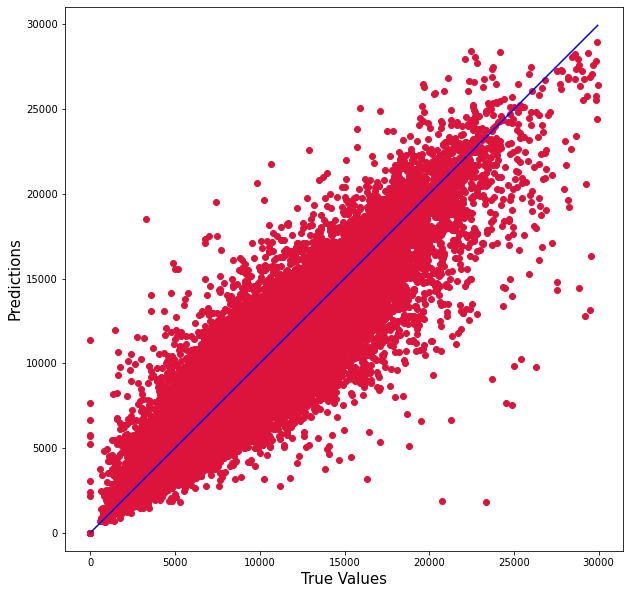

In [46]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(X_train,y_train)

rf_prediction_open = random_forest_regressor_model.predict(X_test)
rf_prediction_closed = np.zeros(combined_data_subset_closed.shape[0])

rf_prediction = np.append(rf_prediction_open, rf_prediction_closed)

rf_y_test = np.append(y_test_open, rf_prediction_closed)

rf_r2_score = r2_score(rf_y_test, rf_prediction)
rf_mae = mean_absolute_error(rf_y_test, rf_prediction)
rf_mse = math.sqrt(mean_squared_error(rf_y_test, rf_prediction))

print("r2_score: ",rf_r2_score)
print("Mean absolute error: %.2f" % rf_mae)
print("Root mean squared error: ", rf_mse)


plt.figure(figsize=(10,10))
plt.scatter(rf_y_test,rf_prediction, c='crimson')

p1 = max(max(rf_prediction), max(rf_y_test))
p2 = min(min(rf_prediction), min(rf_y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [47]:
results = pd.DataFrame([['Randomforest Regressor', rf_r2_score, rf_mae, rf_mse]],
                       columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Root Mean Squared Error'])
results

,Model,R2 Score,Mean Absolute Error,Root Mean Squared Error
0,Randomforest Regressor,0.964897,358.68496,767.791945


## SGD Regressor

Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function.

In [48]:
## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

r2_score:  -7.709608054695749e+24
Mean absolute error: 4463789813126277.00
Root mean squared error:  1.1378642611664138e+16


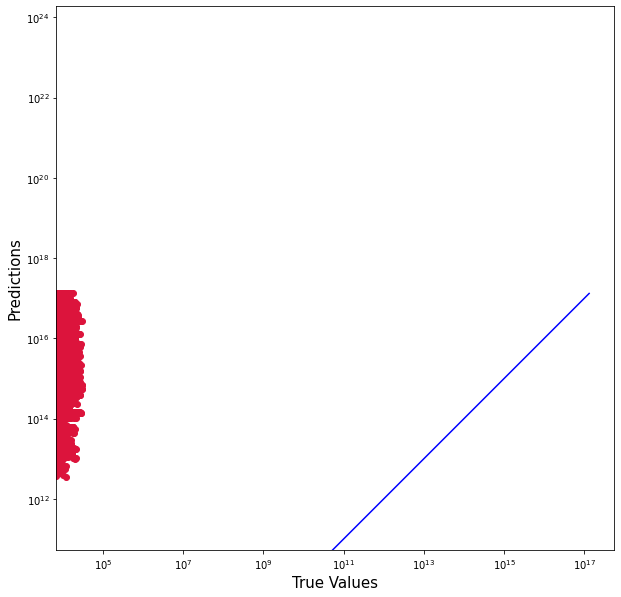

In [49]:
from sklearn.linear_model import SGDRegressor

np.random.seed(42)

sgd_regressor_model = SGDRegressor(max_iter=2)  # increasing this value leads to over fitting
sgd_regressor_model.fit(X_train,y_train)

sgd_prediction_open = sgd_regressor_model.predict(X_test)
sgd_prediction_closed = np.zeros(combined_data_subset_closed.shape[0])

sgd_prediction = np.append(sgd_prediction_open, sgd_prediction_closed)

sgd_y_test = np.append(y_test_open, sgd_prediction_closed)

sgd_r2_score = r2_score(sgd_y_test, sgd_prediction)
sgd_mae = mean_absolute_error(sgd_y_test, sgd_prediction)
sgd_mse = math.sqrt(mean_squared_error(sgd_y_test, sgd_prediction))

print("r2_score: ",sgd_r2_score)
print("Mean absolute error: %.2f" % sgd_mae)
print("Root mean squared error: ", sgd_mse)


plt.figure(figsize=(10,10))
plt.scatter(sgd_y_test, sgd_prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(sgd_prediction), max(sgd_y_test))
p2 = min(min(sgd_prediction), min(sgd_y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [50]:
sdg_results = pd.DataFrame([['SGD Regressor', sgd_r2_score, sgd_mae, sgd_mse]],
                       columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Root Mean Squared Error'])

results = results.append(sdg_results, ignore_index=True)
results

,Model,R2 Score,Mean Absolute Error,Root Mean Squared Error
0,SGD Regressor,-7.709608e+24,4.463790e+15,1.137864e+16


## Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

decision_tree_regressor_model = DecisionTreeRegressor()
decision_tree_regressor_model.fit(X_train,y_train)

dtr_prediction_open = decision_tree_regressor_model.predict(X_test)
dtr_prediction_closed = np.zeros(combined_data_subset_closed.shape[0])

dtr_prediction = np.append(dtr_prediction_open, dtr_prediction_closed)

dtr_y_test = np.append(y_test_open, dtr_prediction_closed)

dtr_r2_score = r2_score(dtr_y_test, dtr_prediction)
dtr_mae = mean_absolute_error(dtr_y_test, dtr_prediction)
dtr_mse = math.sqrt(mean_squared_error(dtr_y_test, dtr_prediction))

print("r2_score: ",dtr_r2_score)
print("Mean absolute error: %.2f" % dtr_mae)
print("Root mean squared error: ", dtr_mse)

r2_score:  0.9509158278399473
Mean absolute error: 423.06
Root mean squared error:  907.9146889507335


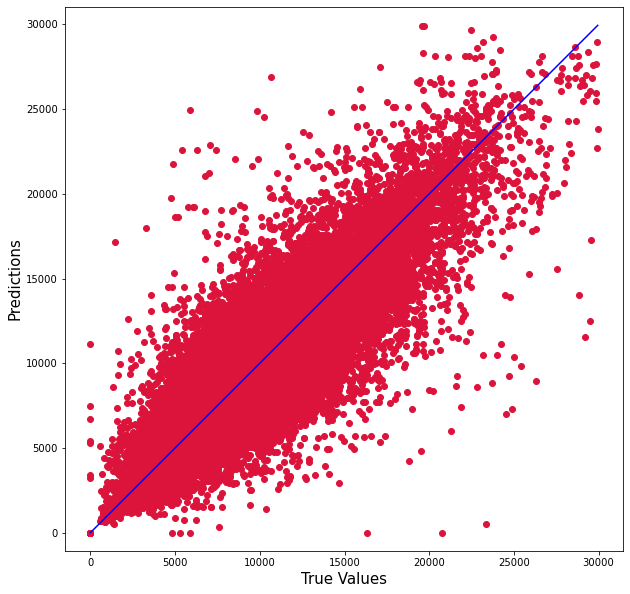

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(dtr_y_test, dtr_prediction, c='crimson')

p1 = max(max(dtr_prediction), max(dtr_y_test))
p2 = min(min(dtr_prediction), min(dtr_y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [54]:
dtr_results = pd.DataFrame([['DecisionTree Regressor', dtr_r2_score, dtr_mae, dtr_mse]],
                       columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Root Mean Squared Error'])

results = results.append(dtr_results, ignore_index=True)
results

,Model,R2 Score,Mean Absolute Error,Root Mean Squared Error
0,DecisionTree Regressor,0.950916,423.06188,907.914689


## Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)

# making regression model
reg_model = LinearRegression() 
reg_model.fit(X_train, y_train) 

# When the stores are open we can predict on the x datasets
prediction_open = reg_model.predict(X_test)

# The stores are closed so we can just predict the zeros
prediction_closed = np.zeros(combined_data_subset_closed.shape[0])

# Total prediction
prediction = np.append(prediction_open, prediction_closed)

y_test = np.append(y_test_open, prediction_closed)

r2_score = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
mse = math.sqrt(mean_squared_error(y_test, prediction))

print("r2_score: ",r2_score)
print("Mean absolute error: %.2f" % mae)
print("Root mean squared error: ", mse )

r2_score:  0.7737631697037071
Mean absolute error: 999.40
Root mean squared error:  1949.1980170023778


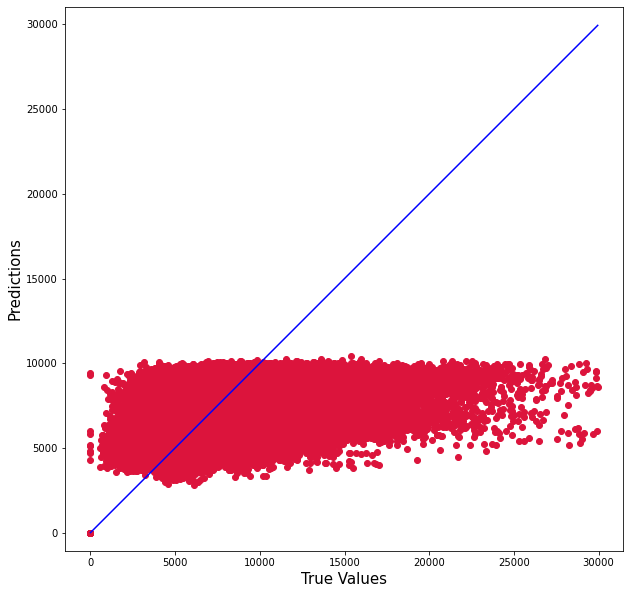

In [57]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,prediction, c='crimson')

p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [58]:
lr_results = pd.DataFrame([['Linear Regression', r2_score, mae, mse]],
                       columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Root Mean Squared Error'])

results = results.append(lr_results, ignore_index=True)
results

,Model,R2 Score,Mean Absolute Error,Root Mean Squared Error
0,Linear Regression,0.773763,999.396307,1949.198017


Random Forest Regressor had the lowest error as compared to other models, that means it is better at predicting sales than other models so we have selected that as our model.

In [98]:
import joblib

# Save the model as a pickle in a file
joblib.dump(random_forest_regressor_model, 'final_model.pkl')

['final_model.pkl']

In [99]:
#loading our saved model - random forest
loaded_model = joblib.load('final_model.pkl')

## Testing our Datasets

In [60]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [78]:
test_data.shape

(41088, 8)

In [79]:
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [80]:
# There are 11 missing values in Open column. Let’s have a detailed look at those:
test_data[np.isnan(test_data['Open'])]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


In [81]:
train_data[train_data['Store'] == 622].head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
621,622,5,2015-07-31,6306,540,1,1,0,1
1736,622,4,2015-07-30,5412,406,1,1,0,1
2851,622,3,2015-07-29,5326,468,1,1,0,1
3966,622,2,2015-07-28,4966,417,1,1,0,1
5081,622,1,2015-07-27,5413,517,1,1,0,1
6196,622,7,2015-07-26,0,0,0,0,0,0
7311,622,6,2015-07-25,2644,257,1,0,0,0
8426,622,5,2015-07-24,4183,440,1,0,0,1
9541,622,4,2015-07-23,3970,399,1,0,0,1
10656,622,3,2015-07-22,3721,376,1,0,0,1


In [82]:
# hence instead of deleting the rows we will fill the missing values with 1
test_data['Open'] = test_data['Open'].fillna(1)

In [83]:
test_data.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [85]:
store_data.head().T

,0,1,2,3,4
Store,1,2,3,4,5
StoreType,c,a,a,c,a
Assortment,a,a,a,c,a
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0
Promo2,0,1,1,0,0
Promo2SinceWeek,0.0,13.0,14.0,0.0,0.0
Promo2SinceYear,0.0,2010.0,2011.0,0.0,0.0
PromoInterval,0,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",0,0


In [86]:
store_data.shape

(1115, 10)

In [87]:
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [88]:
# combine both the datasets
data = test_data.merge(store_data, on='Store').set_index('Id')
data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Id,,,,,,,,,,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [89]:
data = test_data.merge(store_data, how='left', on='Store').set_index('Id')
data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Id,,,,,,,,,,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0
4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0


In [90]:
data.shape

(41088, 16)

In [91]:
data.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### Converting Categorical Variable to Numeric

In [92]:
# extracting year and month from Date 
data['Year']  = data['Date'].apply(lambda x: int(str(x)[:4]))
data['Month'] = data['Date'].apply(lambda x: int(str(x)[5:7]))
data.drop(['Date'],axis=1,inplace=True)

In [93]:
data.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
Id,,,,,,,,,,,,,,,,,
1,1,4,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,9
2,3,4,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9
3,7,4,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,0,2015,9
4,8,4,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0,2015,9
5,9,4,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0,2015,9


In [94]:
# encoding all categorical varibale to numeric values 
label_encoder = preprocessing.LabelEncoder()

data['StoreType']= label_encoder.fit_transform(data['StoreType'])
data['Assortment']= label_encoder.fit_transform(data['Assortment']) 

# for promo interval
data["PromoInterval"].loc[data["PromoInterval"] == "Jan,Apr,Jul,Oct"] = 1
data["PromoInterval"].loc[data["PromoInterval"] == "Feb,May,Aug,Nov"] = 2
data["PromoInterval"].loc[data["PromoInterval"] == "Mar,Jun,Sept,Dec"] = 3


# for State Holiday
data["StateHoliday"].loc[data["StateHoliday"] == "a"] = 1
data["StateHoliday"].loc[data["StateHoliday"] == "b"] = 2
data["StateHoliday"].loc[data["StateHoliday"] == "c"] = 3

data.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
Id,,,,,,,,,,,,,,,,,
1,1,4,1.0,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,9
2,3,4,1.0,1,0,0,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1,2015,9
3,7,4,1.0,1,0,0,0,2,24000.0,4.0,2013.0,0,0.0,0.0,0,2015,9
4,8,4,1.0,1,0,0,0,0,7520.0,10.0,2014.0,0,0.0,0.0,0,2015,9
5,9,4,1.0,1,0,0,0,2,2030.0,8.0,2000.0,0,0.0,0.0,0,2015,9


In [96]:
data.shape

(41088, 17)

In [97]:
# drop the Open column as discussed in the training part - 
# "Feature engineering is very important. e.g. removal of the 'Open'. feature"

test_model = data.drop('Open', axis=1)
test_model.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
Id,,,,,,,,,,,,,,,,
1,1,4,1,0,0,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,9
2,3,4,1,0,0,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,1,2015,9
3,7,4,1,0,0,0,2,24000.0,4.0,2013.0,0,0.0,0.0,0,2015,9
4,8,4,1,0,0,0,0,7520.0,10.0,2014.0,0,0.0,0.0,0,2015,9
5,9,4,1,0,0,0,2,2030.0,8.0,2000.0,0,0.0,0.0,0,2015,9


In [106]:
# Make predictions on the test dataset using the best model
test_model['Predict'] = loaded_model.predict(test_model)

ValueError: X has 17 features, but DecisionTreeRegressor is expecting 16 features as input.

In [107]:
# making the final predictions
final_pred = test_model['Predict']

# reset the index as ID 
final_pred = final_pred.reset_index() 
final_pred.head()

,Id,Predict
0,1,4255.016667
1,2,7589.691333
2,3,10387.956833
3,4,8576.167167
4,5,8124.499833


In [102]:
final_pred.tail()

,Id,Predict
41083,41084,2537.763651
41084,41085,7149.747897
41085,41086,5876.968500
41086,41087,21678.334786
41087,41088,7060.559917


In [103]:
# Export prediction data
final_pred.to_csv("test_predictions.csv", index=False)

## Understanding the important features

In [72]:
# getting weights of all the features used in the data
feature_importance = random_forest_regressor_model.feature_importances_
feature_importance

array([0.181487  , 0.08209221, 0.14037762, 0.00111898, 0.01271742,
       0.03522146, 0.03040142, 0.20653743, 0.06798495, 0.07511152,
       0.00350417, 0.03062123, 0.03249315, 0.01370627, 0.02386668,
       0.06275849])

In [73]:
# features used
columns = list(X_train.columns)
columns

['Store',
 'DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'Year',
 'Month']

In [74]:
feature_importance_value = []
for i in range(len(feature_importance)):
    feature_importance_value.append(round(feature_importance[i],5))
feature_importance_value

[0.18149,
 0.08209,
 0.14038,
 0.00112,
 0.01272,
 0.03522,
 0.0304,
 0.20654,
 0.06798,
 0.07511,
 0.0035,
 0.03062,
 0.03249,
 0.01371,
 0.02387,
 0.06276]

In [75]:
# Making a dataframe to show the feature importance values
feature_importance_df = pd.DataFrame({"Features":columns, 
                                     "Values":feature_importance_value})
feature_importance_df

,Features,Values
0,Store,0.18149
1,DayOfWeek,0.08209
2,Promo,0.14038
3,StateHoliday,0.00112
4,SchoolHoliday,0.01272
5,StoreType,0.03522
6,Assortment,0.03040
7,CompetitionDistance,0.20654
8,CompetitionOpenSinceMonth,0.06798
9,CompetitionOpenSinceYear,0.07511


In [76]:
# Sorting by the values
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
7,CompetitionDistance,0.20654
0,Store,0.18149
2,Promo,0.14038
1,DayOfWeek,0.08209
9,CompetitionOpenSinceYear,0.07511
8,CompetitionOpenSinceMonth,0.06798
15,Month,0.06276
5,StoreType,0.03522
12,Promo2SinceYear,0.03249
11,Promo2SinceWeek,0.03062


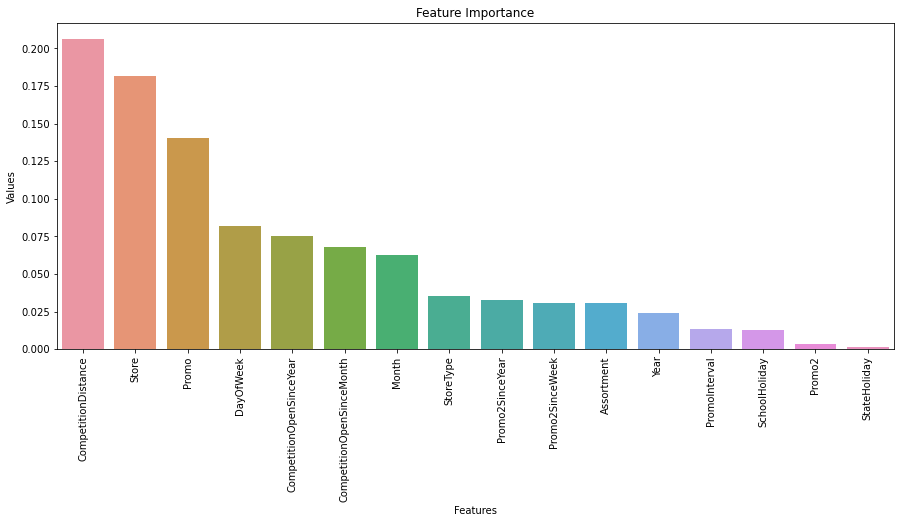

In [77]:
# Feature Importance visualization
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

### Conclusion
* Feature engineering is very important. e.g. removal of the 'Open'. feature
* Closer competiton distance make stores more competitive and thus using Promo codes can help them to boost sales
* Store Type affects the sales
* Promo code can help increase in the competition and lead to more sales
* Since most of the stores are closed on Holidays, the feature has no effect on sales

**Author: Jammal Adeyemi**